In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colors import *

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('C:\\Users\\esugom\\OneDrive - Coventry University\\CodePhD\\Stockton\\01TrainVal.csv')

In [3]:
TrainVal['index'] = pd.to_datetime(TrainVal['index'])
TrainVal.rename(columns = {'index':'Timestamp'}, inplace=True)

In [4]:
plt.rcParams.update({'font.size': 20})

# Feature Engineering

## Split to Training and Test Data

In [5]:
len(TrainVal)

35136

In [6]:
test_percent = 0.1     # 10 % used as test data
len(TrainVal)*test_percent
test_point = np.round(len(TrainVal)*test_percent)
test_ind = int(len(TrainVal) - test_point)

In [7]:
test_ind

31622

In [8]:
train = TrainVal.iloc[:test_ind]      #From 1st element to 31575
test = TrainVal.iloc[test_ind:]       #From 31575 to end

In [9]:
test

,Timestamp,f1,f2,f3,f4,f5,f6,f7
31622,2019-06-18 19:10:00,268.0,290.0,295.0,217.0,267.0,253.0,213.0
31623,2019-06-18 19:15:00,266.0,304.0,321.0,276.0,347.0,237.0,207.0
31624,2019-06-18 19:20:00,289.0,305.0,328.0,269.0,340.0,223.0,218.0
31625,2019-06-18 19:25:00,271.0,249.0,273.0,235.0,282.0,223.0,206.0
31626,2019-06-18 19:30:00,240.0,246.0,267.0,204.0,253.0,189.0,190.0
...,...,...,...,...,...,...,...,...
35131,2019-06-30 23:35:00,141.0,143.0,150.0,142.0,153.0,110.0,84.0
35132,2019-06-30 23:40:00,132.0,128.0,139.0,116.0,114.0,98.0,89.0
35133,2019-06-30 23:45:00,106.0,111.0,123.0,127.0,146.0,94.0,85.0
35134,2019-06-30 23:50:00,137.0,140.0,141.0,103.0,124.0,109.0,95.0


# Visualizations

In [10]:
typday1 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 18)]

In [11]:
typday2 = train[(train['Timestamp'].dt.month == 4) & (train['Timestamp'].dt.day == 21)]

In [12]:
typday2.reset_index( inplace=True)

In [13]:
typday1.index = range(len(typday1))
typday2.index = range(len(typday2))

In [14]:
len(typday1)

288

In [15]:
# map timestamp to a variable x
x = np.linspace(0,288,288)

In [16]:
a = typday1['f5'][0:60]
b = typday1['f5'][60:85]
c = typday1['f5'][85:180]
d = typday1['f5'][180:190]
e = typday1['f5'][190:288]

In [17]:
by = x[60:85]
dy = x[180:190]

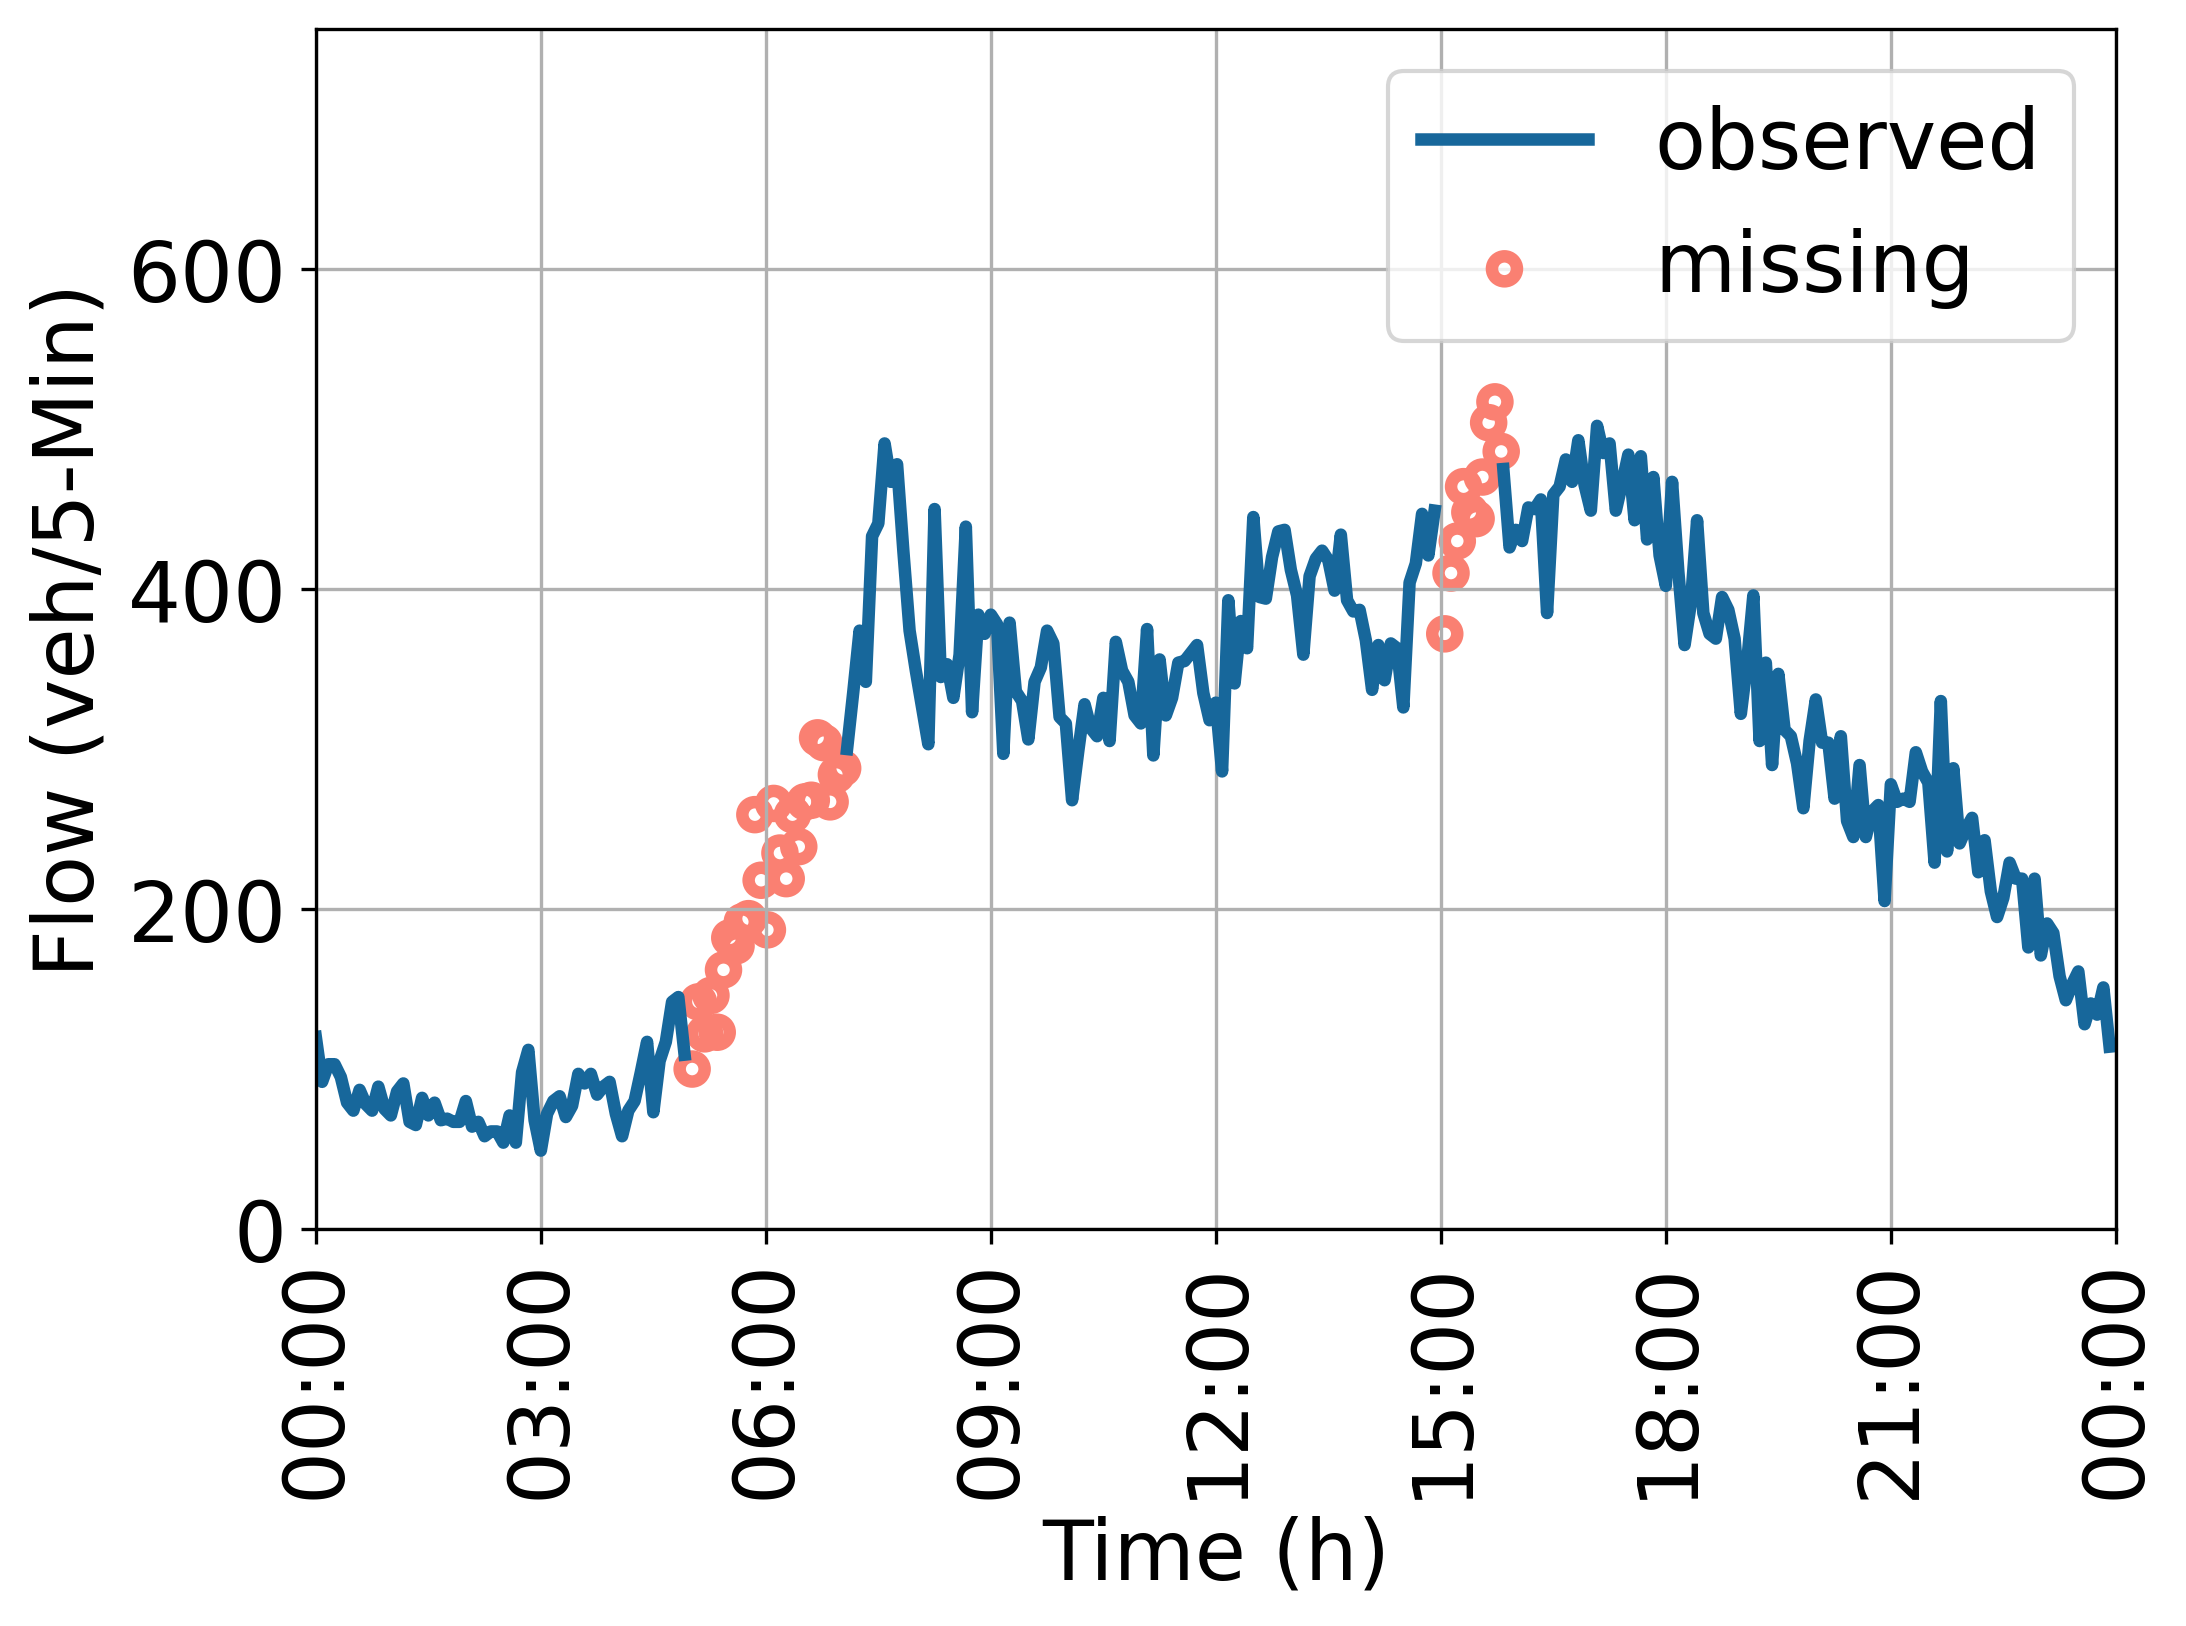

In [18]:
# Create Figure (empty canvas)
fig = plt.figure(dpi=300)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)


# Plot on that set of axes
axes.plot(a, lw=3, color=BLUE2, label='observed')
axes.scatter(by, b, facecolors='none', edgecolors='salmon', label='missing', lw=3)
axes.plot(c, lw=3, color=BLUE2)
axes.scatter(dy, d, facecolors='none', edgecolors='salmon', lw=3)
axes.plot(e, lw=3, color=BLUE2)

axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.grid()
axes.legend(loc=1)

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], rotation = 90)

plt.show()

In [19]:
a = typday2['f5'][0:35]
b = typday2['f5'][39:50]
c = typday2['f5'][52:70]
d = typday2['f5'][72:120]
e = typday2['f5'][122:155]
f = typday2['f5'][156:207]
g = typday2['f5'][208:288]

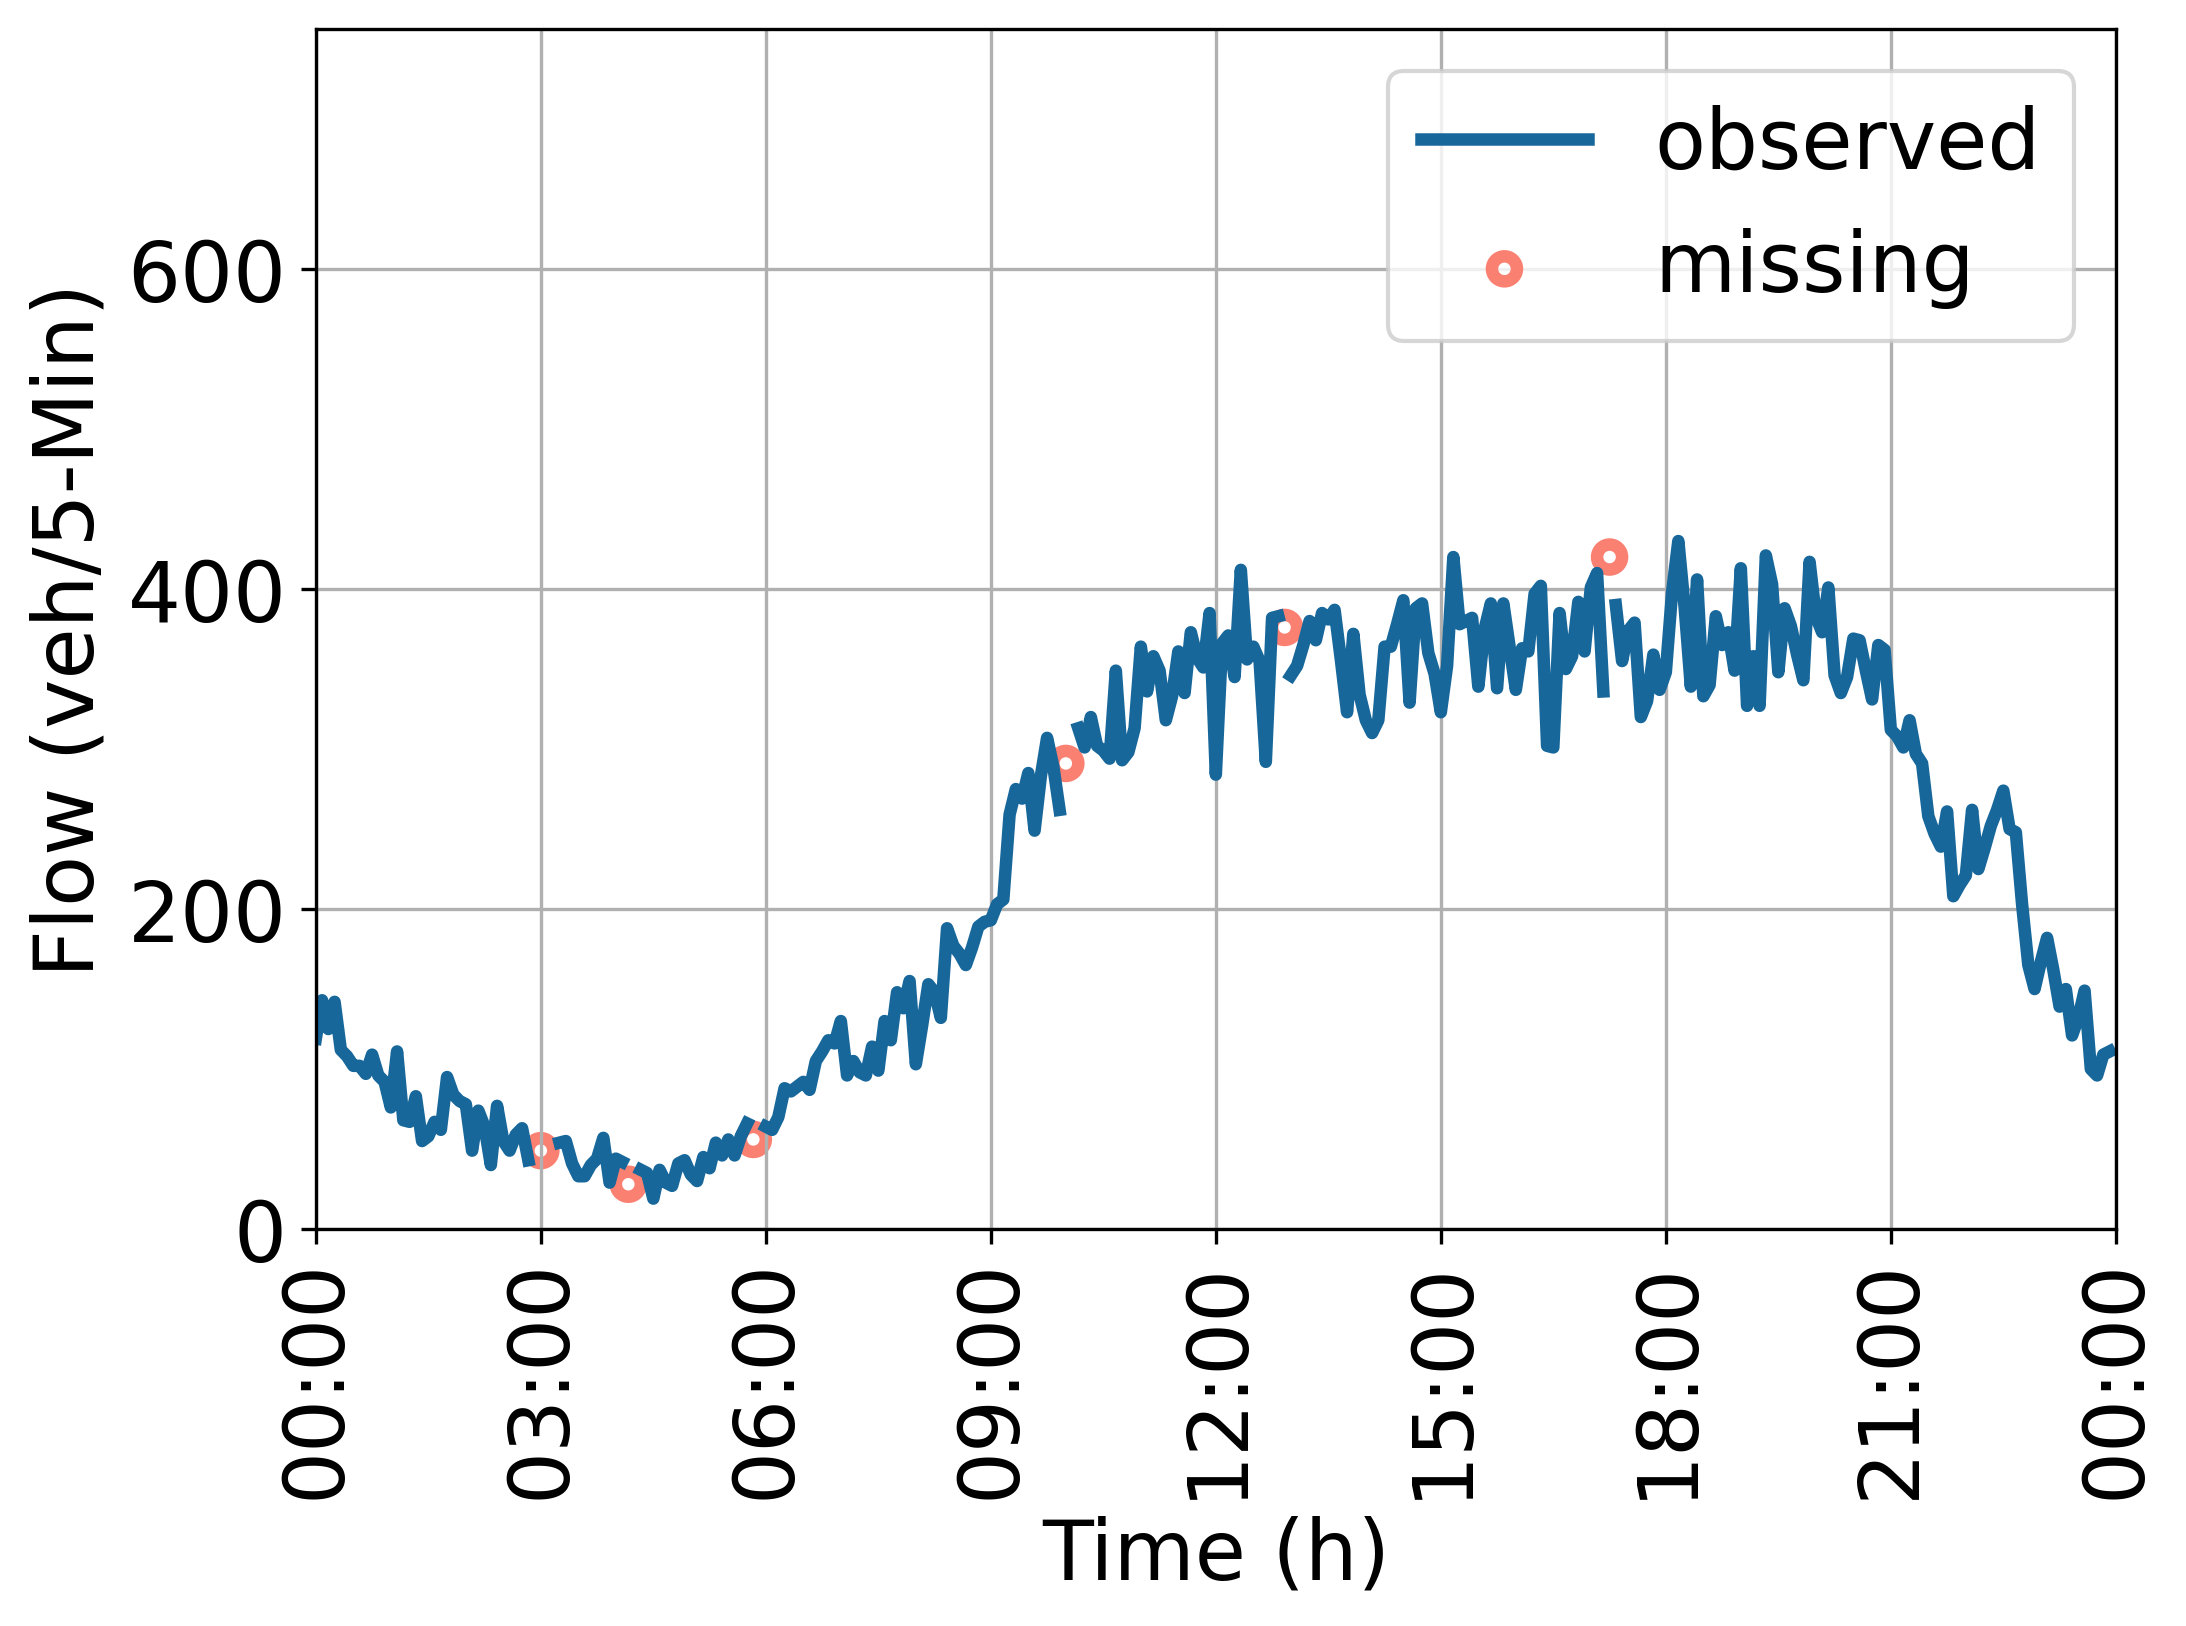

In [20]:
# Create Figure (empty canvas)
fig = plt.figure(dpi=300)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)


# Plot on that set of axes
axes.plot(a, lw=3, color=BLUE2, label='observed')
axes.plot(b, lw=3, color=BLUE2)
axes.plot(c, lw=3, color=BLUE2)
axes.plot(d, lw=3, color=BLUE2)
axes.plot(e, lw=3, color=BLUE2)
axes.plot(f, lw=3, color=BLUE2)
axes.plot(g, lw=3, color=BLUE2)

axes.scatter(36, typday2['f5'][36], facecolors='none', edgecolors='salmon', label='missing', lw=3)
axes.scatter(50, typday2['f5'][50], facecolors='none', edgecolors='salmon', lw=3)
axes.scatter(70, typday2['f5'][70], facecolors='none', edgecolors='salmon', lw=3)
axes.scatter(120, typday2['f5'][120], facecolors='none', edgecolors='salmon', lw=3)
axes.scatter(155, typday2['f5'][155], facecolors='none', edgecolors='salmon', lw=3)
axes.scatter(207, typday2['f5'][207], facecolors='none', edgecolors='salmon', lw=3)
# axes.scatter(207, typday2['f5'][207], facecolors='none', edgecolors='salmon')


axes.set_xlim(0,24)
axes.set_ylim(0,750)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.grid()
axes.legend(loc=1)

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'], rotation = 90)

plt.show()